全国の観光スポット情報の収集を開始します（各都道府県全件）...

北海道の観光スポット情報を取得中...
北海道: 30件のスポットを取得

青森県の観光スポット情報を取得中...
青森県: 30件のスポットを取得

岩手県の観光スポット情報を取得中...
岩手県: 30件のスポットを取得

宮城県の観光スポット情報を取得中...
宮城県: 30件のスポットを取得

秋田県の観光スポット情報を取得中...
秋田県: 30件のスポットを取得

山形県の観光スポット情報を取得中...
山形県: 30件のスポットを取得

福島県の観光スポット情報を取得中...
福島県: 30件のスポットを取得

茨城県の観光スポット情報を取得中...
茨城県: 30件のスポットを取得

栃木県の観光スポット情報を取得中...
栃木県: 30件のスポットを取得

群馬県の観光スポット情報を取得中...
群馬県: 30件のスポットを取得

埼玉県の観光スポット情報を取得中...
埼玉県: 30件のスポットを取得

千葉県の観光スポット情報を取得中...
千葉県: 30件のスポットを取得

東京都の観光スポット情報を取得中...
東京都: 30件のスポットを取得

神奈川県の観光スポット情報を取得中...
神奈川県: 30件のスポットを取得

新潟県の観光スポット情報を取得中...
新潟県: 30件のスポットを取得

富山県の観光スポット情報を取得中...
富山県: 30件のスポットを取得

石川県の観光スポット情報を取得中...
石川県: 30件のスポットを取得

福井県の観光スポット情報を取得中...
福井県: 30件のスポットを取得

山梨県の観光スポット情報を取得中...
山梨県: 30件のスポットを取得

長野県の観光スポット情報を取得中...
長野県: 30件のスポットを取得

岐阜県の観光スポット情報を取得中...
岐阜県: 30件のスポットを取得

静岡県の観光スポット情報を取得中...
静岡県: 30件のスポットを取得

愛知県の観光スポット情報を取得中...
愛知県: 30件のスポットを取得

三重県の観光スポット情報を取得中...
三重県: 30件のスポットを取得

滋賀県の観光スポット情報を取得中...
滋賀県: 30件のスポットを取得

京都府の観光スポット情報を取

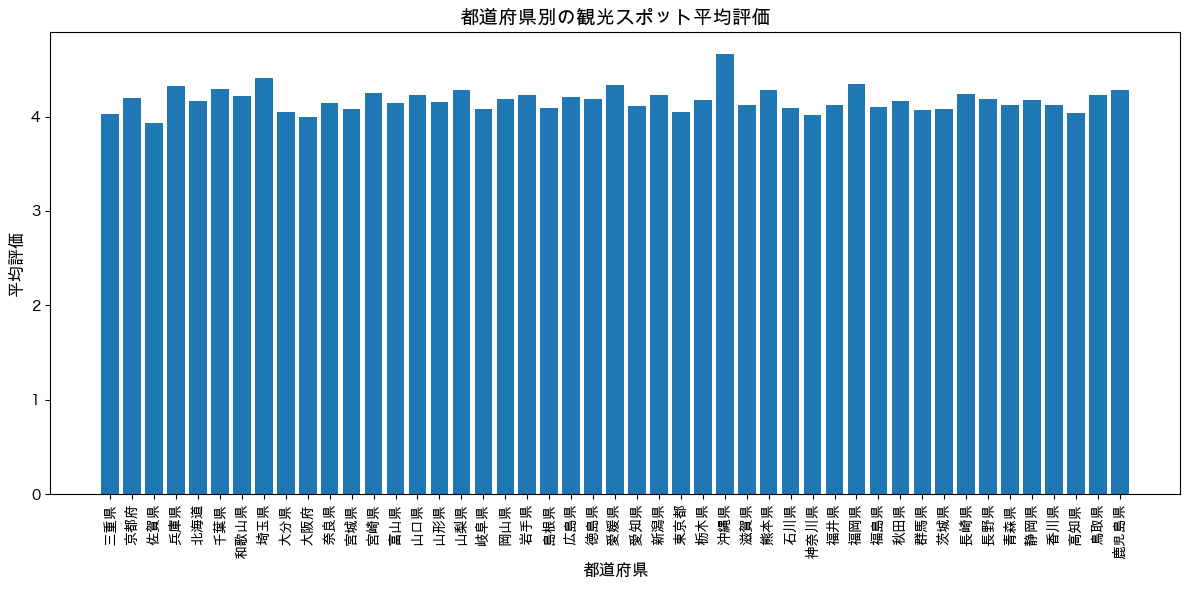

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Hiragino Sans')
import matplotlib.pyplot as plt


class PrefectureTouristSpotScraper:
    def __init__(self):
        self.base_url = "https://www.jalan.net"
        
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        # 都道府県リスト
        self.prefectures = {
           '北海道': '/kankou/010000/?screenId=OUW1021/',
            '青森県': '/kankou/020000/?screenId=OUW1021',
            '岩手県': '/kankou/030000/?screenId=OUW1021',
            '宮城県': '/kankou/040000/?screenId=OUW1021',
            '秋田県': '/kankou/050000/?screenId=OUW1021',
            '山形県': '/kankou/060000/?screenId=OUW1021',
            '福島県': '/kankou/070000/?screenId=OUW1021',
            '茨城県': '/kankou/080000/?screenId=OUW1021',
            '栃木県': '/kankou/090000/?screenId=OUW1021',
            '群馬県': '/kankou/100000/?screenId=OUW1021',
            '埼玉県': '/kankou/110000/?screenId=OUW1021',
            '千葉県': '/kankou/120000/?screenId=OUW1021',
            '東京都': '/kankou/130000/?screenId=OUW1021',
            '神奈川県': '/kankou/140000/?screenId=OUW1021',
            '新潟県': '/kankou/150000/?screenId=OUW1021',
            '富山県': '/kankou/160000/?screenId=OUW1021',
            '石川県': '/kankou/170000/?screenId=OUW1021',
            '福井県': '/kankou/180000/?screenId=OUW1021',
            '山梨県': '/kankou/190000/?screenId=OUW1021',
            '長野県': '/kankou/200000/?screenId=OUW1021',
            '岐阜県': '/kankou/210000/?screenId=OUW1021',
            '静岡県': '/kankou/220000/?screenId=OUW1021',
            '愛知県': '/kankou/230000/?screenId=OUW1021',
            '三重県': '/kankou/240000/?screenId=OUW1021',
            '滋賀県': '/kankou/250000/?screenId=OUW1021',
            '京都府': '/kankou/260000/?screenId=OUW1021',
            '大阪府': '/kankou/270000/?screenId=OUW1021',
            '兵庫県': '/kankou/280000/?screenId=OUW1021',
            '奈良県': '/kankou/290000/?screenId=OUW1021',
            '和歌山県': '/kankou/300000/?screenId=OUW1021',
            '鳥取県': '/kankou/310000/?screenId=OUW1021',
            '島根県': '/kankou/320000/?screenId=OUW1021',
            '岡山県': '/kankou/330000/?screenId=OUW1021',
            '広島県': '/kankou/340000/?screenId=OUW1021',
            '山口県': '/kankou/350000/?screenId=OUW1021',
            '徳島県': '/kankou/360000/?screenId=OUW1021',
            '香川県': '/kankou/370000/?screenId=OUW1021',
            '愛媛県': '/kankou/380000/?screenId=OUW1021',
            '高知県': '/kankou/390000/?screenId=OUW1021',
            '福岡県': '/kankou/400000/?screenId=OUW1021',
            '佐賀県': '/kankou/410000/?screenId=OUW1021',
            '長崎県': '/kankou/420000/?screenId=OUW1021',
            '熊本県': '/kankou/430000/?screenId=OUW1021',
            '大分県': '/kankou/440000/?screenId=OUW1021',
            '宮崎県': '/kankou/450000/?screenId=OUW1021',
            '鹿児島県': '/kankou/460000/?screenId=OUW1021',
            '沖縄県': '/kankou/470000/?screenId=OUW1021'
        }

    def get_tourist_spots(self, prefecture, path):
        """指定された都道府県の観光スポット情報と評価を取得（全件）"""
        spots_data = []
        
        try:
            search_url = f"{self.base_url}{path}"
            response = requests.get(search_url, headers=self.headers)
            response.raise_for_status()
            
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # 観光スポットのリストを取得
            spot_elements = soup.select('div.item-listContents')
            
            # 全ての観光スポットを処理
            for spot in spot_elements:
                try:
                    # スポット名の取得
                    name_element = spot.select_one('div.item-name a')
                    spot_name = name_element.text.strip() if name_element else 'N/A'
                    spot_url = self.base_url + name_element['href'] if name_element and name_element.get('href') else 'N/A'
                    
                    # 説明文の取得
                    description = spot.select_one('div.item-description')
                    description_text = description.text.strip() if description else 'N/A'
                    
                    # カテゴリの取得
                    category = spot.select_one('div.item-category')
                    category_text = category.text.strip() if category else 'N/A'
                    
                    # 評価の取得
                    rating_element = spot.select_one('div.rating span.reviewPoint')
                    rating = float(rating_element.text) if rating_element else 0.0
                    
                    spot_data = {
                        '都道府県': prefecture,
                        'スポット名': spot_name,
                        'カテゴリ': category_text,
                        '説明': description_text,
                        'URL': spot_url,
                        '評価': rating
                    }
                    spots_data.append(spot_data)
                    
                except Exception as e:
                    print(f"スポットデータの解析エラー ({prefecture}): {e}")
                    continue
            
            print(f"{prefecture}: {len(spots_data)}件のスポットを取得")
            time.sleep(random.uniform(1, 2))
            
        except requests.exceptions.RequestException as e:
            print(f"リクエストエラー ({prefecture}): {e}")
        except Exception as e:
            print(f"予期せぬエラー ({prefecture}): {e}")
            
        return spots_data

    def scrape_all_spots(self):
        """全都道府県の観光スポット情報を取得（各全件）"""
        all_spots_data = []
        
        for prefecture, path in self.prefectures.items():
            print(f"\n{prefecture}の観光スポット情報を取得中...")
            spots_data = self.get_tourist_spots(prefecture, path)
            all_spots_data.extend(spots_data)
        
        if all_spots_data:
            df = pd.DataFrame(all_spots_data)
            current_date = datetime.now().strftime('%Y%m%d')
            filename = f'prefecture_tourist_spots_{current_date}.csv'
            df.to_csv(filename, index=False, encoding='utf-8-sig')
            
            print(f"\n処理完了: {filename}に保存されました")
            return df
        else:
            print("\nデータを取得できませんでした")
            return pd.DataFrame()

    def display_summary(self, df):
        """取得したデータの要約を表示"""
        if not df.empty:
            print("\n=== データ収集サマリー ===")
            print(f"総スポット数: {len(df)}")
            print("\n都道府県別スポット数:")
            print(df['都道府県'].value_counts())
            print("\nカテゴリ別スポット数:")
            print(df['カテゴリ'].value_counts().head())
            
            # 都道府県ごとの評価の平均点を計算
            prefecture_ratings = df.groupby('都道府県')['評価'].mean().reset_index()
            prefecture_ratings = prefecture_ratings.rename(columns={'評価': '平均評価'})
            
            print("\n都道府県別の平均評価:")
            print(prefecture_ratings)
            
            return prefecture_ratings

def main():
    scraper = PrefectureTouristSpotScraper()
    print("全国の観光スポット情報の収集を開始します（各都道府県全件）...")
    spots_df = scraper.scrape_all_spots()
    
    if not spots_df.empty:
        prefecture_ratings = scraper.display_summary(spots_df)
        
        # 棒グラフを作成
        plt.figure(figsize=(12, 6))
        plt.bar(prefecture_ratings['都道府県'], prefecture_ratings['平均評価'])
        plt.xlabel('都道府県', fontsize=12, fontname='Arial Unicode MS')  # Windows環境の場合
        plt.ylabel('平均評価', fontsize=12, fontname='Arial Unicode MS')  # Windows環境の場合
        plt.xticks(rotation=90, fontname='Arial Unicode MS')  # Windows環境の場合
        plt.title('都道府県別の観光スポット平均評価', fontsize=14, fontname='Arial Unicode MS')  # Windows環境の場合
        plt.tight_layout()
        plt.show()
if __name__ == "__main__":
    main()